In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**DC NOISE SIGNAL**

The estimated DC signal is 5.001548651830449 


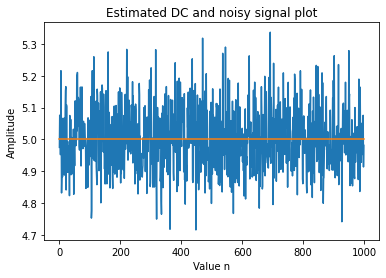

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/DC_noise1.xlsx')
t = data["y"].to_numpy()
s = data["n"].to_numpy()

sum = 0
for i in range(0,s.size):
  sum +=t[i]


final_signal = sum / s.size
print(f'The estimated DC signal is {final_signal} ')
b = np.repeat(final_signal,s.size)

plt.title("Estimated DC and noisy signal plot")
plt.xlabel("Value n")
plt.ylabel("Amplitude")
plt.plot(s,t)
plt.plot(s,b)
plt.show()

**DC NOISE SIGNAL WITH OUTLIERS - USING MEAN**

The mean with the outliers present 5.1095486518304485
The estimated DC signal is 5.004673603032533 after removing the outliers 


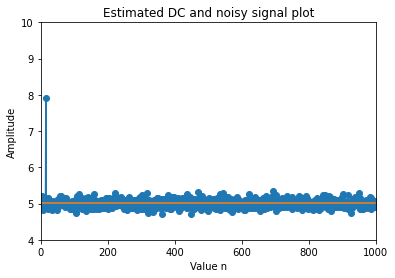

In [5]:
data = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/DC_noise2.xlsx')
t = data["y"].to_numpy()
s = data["n"].to_numpy()
f = t

sum = 0
for i in range(0,s.size):
  sum +=t[i]

final_signal = sum / s.size
print(f'The mean with the outliers present {final_signal}')

th = np.std(t, axis = None)

min = int(final_signal - th)
max = int(final_signal + th)

for i in range(0,s.size):
  if(f[i] > max or f[i] < min ):
    f[i] = final_signal

sum3 = 0
for i in range(0,s.size):
  sum3 +=f[i]

final_signal = sum3 / s.size
print(f'The estimated DC signal is {final_signal} after removing the outliers ')

b = np.repeat(final_signal,s.size)

plt.title("Estimated DC and noisy signal plot")
plt.xlabel("Value n")
plt.ylabel("Amplitude")
plt.plot(s,t)
plt.plot(s,b)
plt.xlim(0, 1000)
plt.ylim(4,10)
plt.scatter(s,t)
plt.show()

**DC NOISE WITH OUTLIERS - USING MEDIAN (THE CORRECT ONE)**

The estimated DC signal after removing 
the outliers using the median is 4.996768448475141


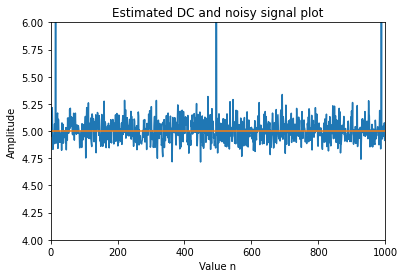

In [7]:
data = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/DC_noise2.xlsx')
t = data["y"].to_numpy()
s = data["n"].to_numpy()
f = t
median1 = np.median(f)

plt.plot(s,t)

threshold = np.std(f, axis = None)

max = median1 + threshold
min = median1 - threshold

for i in range(s.size):
  if(f[i]>= max or f[i]<= max):
    f[i] = median1

print(f'The estimated DC signal after removing \nthe outliers using the median is {median1}')
plt.title("Estimated DC and noisy signal plot")
plt.xlabel("Value n")
plt.ylabel("Amplitude")
plt.plot(s,f)
plt.xlim(0, 1000)
plt.ylim(4,6)
plt.show()

**RAMP NOISE ESTIMATION**



[  2.98967968 -35.15335258]
The estimated value of the slope 'a' is 2.989679675255413
The estimated value of the intercept 'c' is -35.15335258320537


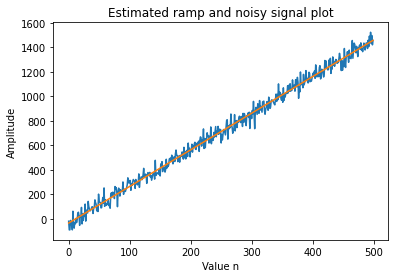

In [9]:
data = pd.read_excel('/content/gdrive/MyDrive/Lab1_partA/ramp_noise.xlsx')
column_2 = data["y"].to_numpy()
s = data["x"].to_numpy()
column_0 = data["Unnamed: 0"].to_numpy()
count = column_0.size

M_col0 = np.arange(0, count)
M_col1 = np.repeat(1,count)

M = np.column_stack((M_col0,M_col1))
M_t = M.transpose()
m = M_t @ M
m_inv = np.linalg.inv(m)
Est = m_inv @ M_t

Estimation = Est @ column_2
print(Estimation)
print(f"The estimated value of the slope 'a' is {Estimation[0]}")
print(f"The estimated value of the intercept 'c' is {Estimation[1]}")

signal = M @ (Estimation.transpose())

plt.title("Estimated ramp and noisy signal plot")
plt.xlabel("Value n")
plt.ylabel("Amplitude")
plt.plot(s,column_2)
plt.plot(s,signal)
plt.show()


 **Sinusoidal Wave Estimation**

The amplitude value is 5.068680166950483
The phi value in degree is 15.970859398614596


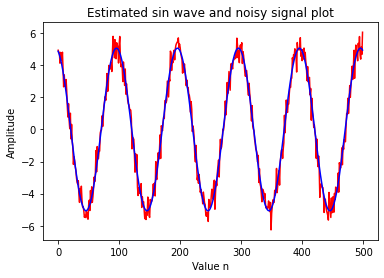

In [10]:
d = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/sinusoid_noise.xlsx')
data = d.to_numpy()

col0 = d['Unnamed: 0'].to_numpy()
col1 = d["y"].to_numpy()

f0 = 10

mylist = []
for i in range(0, len(col0)):
  mylist.append(np.cos(2*(np.pi)* i/100))
H0 = np.array(mylist)

mylist = []
for i in range(0, len(col0)):
  mylist.append(np.sin(2*(np.pi)* i * 1/100))
H1 = np.array(mylist)

H = np.column_stack((H0,H1))

alpha = np.linalg.inv(H.transpose() @ H) @ H.transpose() @ col1

A = np.sqrt(alpha[0]*alpha[0] + alpha[1]*alpha[1] )
phi = np.arctan(-alpha[1]/alpha[0])

theta = np.array([A,phi])

c = np.arange(0,col1.size,1)
signal = A * np.cos(2 * np.pi * c/100 + phi)
print(f'The amplitude value is {A}')
print(f'The phi value in degree is {phi * 180 / np.pi}')

plt.title("Estimated sin wave and noisy signal plot")
plt.xlabel("Value n")
plt.ylabel("Amplitude")
plt.plot(col0,col1, c = 'r')
plt.plot(c,signal,c = 'b')
plt.show()


**Piecewise Signal Estimation using Mean and STD**

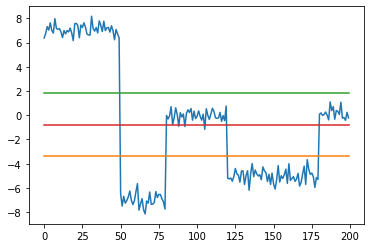

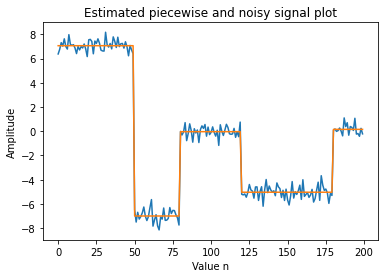

In [11]:
d = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/noisy_signal.xlsx')
data = d.to_numpy()
col0 = d['Unnamed: 0'].to_numpy()
col1 = d["y"].to_numpy()

sum = 0
for i in range(0,col0.size):
  sum = sum + col1[i]
mean = sum / col0.size

dev = np.std(col1) 

max = mean + dev / 2
min = mean - dev / 2

n = col0.size
a = min*np.ones((n))
b = max*np.ones((n))
c = mean*np.ones((n))
plt.plot(col0,col1)
plt.plot(col0,a)
plt.plot(col0,b)
plt.plot(col0,c)
plt.show()

s = np.zeros((200))
i = 0
j=0
while (i < n):
  sum = 0
  c = 0
  if(col1[i] > max):
    while(i < 200 and col1[i] > max):
      sum = sum + col1[i]
      c = c + 1
      i = i+1
    mean1 = sum / c
    s[j:i] = mean1
    j = i
  elif(col1[i] < min):
    while(i < 200 and col1[i] < min):
      sum = sum + col1[i]
      c = c + 1
      i = i+1
    mean1 = sum / c
    s[j:i] = mean1
    j = i
  else:
    while(i < 200 and col1[i] < max and col1[i] > min):
      sum = sum + col1[i]
      c = c + 1
      i = i+1
    mean1 = sum / c
    s[j:i] = mean1
    j = i

plt.title("Estimated piecewise and noisy signal plot")
plt.xlabel("Value n")
plt.ylabel("Amplitude")
plt.plot(col0,col1)
plt.plot(col0,s)
plt.show()


**Piecewise signal estimation using L2 norm matrix (The correct one)**

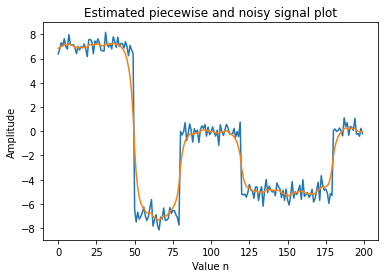

In [12]:
d = pd.read_excel(r'/content/gdrive/MyDrive/Lab1_partA/noisy_signal.xlsx')
data = d.to_numpy()
col0 = d['Unnamed: 0'].to_numpy()
col1 = d["y"].to_numpy()
l = 5.5
n = col0.size
T = np.zeros((n-1,n))

for i in range(n-1):
  for j in range(n):
    if i == j:
      T[i][j] = 1
      T[i][j+1] = -1

I = np.zeros((n,n))
for i in range(0,n):
  for j in range(0,n):
    if i == j:
      I[i][j] = 1

T = T.transpose() @ T
value = l * T

value = I + value
x =  np.linalg.inv(value)@col1

plt.title("Estimated piecewise and noisy signal plot")
plt.xlabel("Value n")
plt.ylabel("Amplitude")
plt.plot(col0,col1)
plt.plot(col0,x)
plt.show()